<a href="https://colab.research.google.com/github/austinbennysmith/OSOM-ERDDAP/blob/master/RI_Buoy_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook graphs surface chlorophyll from 3 buoy locations in Narragansett Bay. It uses the dataset called "RI Buoy Data" from the [RIDDC ERDDAP Server](https://pricaimcit.services.brown.edu/erddap/index.html). Currently, the code throws an error after making all the graphs, as seen below...if I end up using this code in the future, I'll need to figure out why this is. However, I think it is working correctly. I think the error is because the list of station names is for some reason longer than the actual number of stations for which the dataset has data - in the results below, where I print stationarray, it has a bunch of stations that aren't actually present in the data (the stations being bid5, bid2, etc...the dataset only actually has data for three of these). It seems to be making the right graphs for the datasets that do exist. However, when I print the station names before the graphs (as below), it seems to be the wrong station names.....

In [ ]:
#First, some installations and imports:
!pip install netCDF4
import matplotlib.pyplot as plt
import requests
from netCDF4 import Dataset as NetCDFFile
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import datetime
from datetime import datetime as dt

['bid5', 'bid2', 'bid3', 'bid15', 'bid13', 'bid16', 'bid17', 'bid6', 'bid8', 'bid9', 'bid7', 'bid10', 'bid4']
['bid5', 'bid2', 'bid3', 'bid15', 'bid13', 'bid16', 'bid17', 'bid6', 'bid8', 'bid9', 'bid7', 'bid10', 'bid4']
bid5


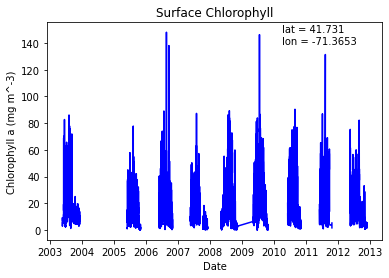

bid2


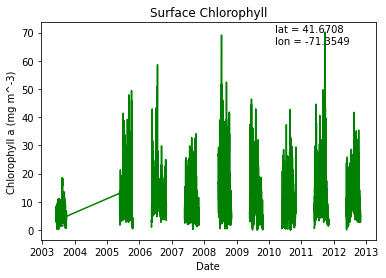

bid3


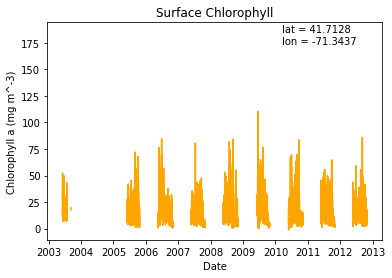

bid15


IndexError: ignored

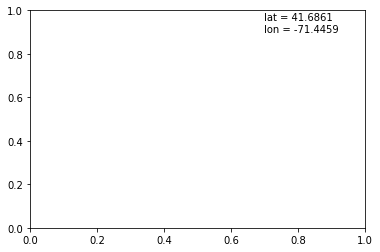

In [10]:
#I'm just copy & pasting the following url from the ERDDAP interactive page
url = 'https://pricaimcit.services.brown.edu/erddap/tabledap/combined_e784_bee5_492e.nc?time%2Cstation_name%2CChlorophyllSurface%2Clatitude%2Clongitude&time%3E=2003-05-24T04%3A30%3A00Z&time%3C=2012-12-31T23%3A45%3A00Z&latitude%3E=40.5&latitude%3C=42.25&longitude%3E=-72.75&longitude%3C=-69.75'
r = requests.get(url, allow_redirects=True)
open('test.nc', 'wb').write(r.content)
nc = NetCDFFile('test.nc')
nc
#making a list of the stations (it seems that list is longer than it should be):
station_name = nc.variables['station_name'][:]
stationarray = []
for j in station_name:
  stationarray.append(j)
stationarray = list(dict.fromkeys(station_name))
print(stationarray)
#I will have a dictionary for chlorophyll, time, latitude, and longitude, whose keys will correspond to the stations and whose values will be the data at those stations
chla_dict = {}
time_dict = {}
lat_dict = {}
lon_dict = {}
for k in stationarray:
  #using .format(k) allows me to name the keys according to the elements of stationarray:
  chla_dict['chla{0}'.format(k)] = nc.variables['ChlorophyllSurface'][station_name==k]
  time_dict['time{0}'.format(k)] = nc.variables['time'][station_name==k]
  lat_dict['lat{0}'.format(k)] = nc.variables['latitude'][station_name==k]
  lon_dict['lon{0}'.format(k)] = nc.variables['longitude'][station_name==k]
new_time_dict = {}
#The following for loop removes duplicate entries from the latitude & longitude lists at each station. I'll use the single-entry lat & lon to put text in the graph that tells where the buoy is from which the graph is generated.
#The loop will also create a new_time_dict with time lists that are better for graphing
for w in stationarray:
  #since I named the variables according to the elements of stationarray, I reference them using w, e.g. 'lat'+w
  lat_dict['lat'+w] = list(dict.fromkeys(lat_dict['lat'+w]))
  lon_dict['lon'+w] = list(dict.fromkeys(lon_dict['lon'+w]))
  timearray = []
  for y in time_dict['time'+w]:
    timearray.append(dt.fromtimestamp(y))
  new_time_dict['nicetime{0}'.format(w)] = timearray
carray = ['blue', 'green', 'orange']
print(stationarray)
#plotting:
for z in stationarray:
  print(z)
  coordstring = '''lat = '''+str(lat_dict['lat'+z])+'''
lon = '''+str(lon_dict['lon'+z])
  coordstring = coordstring.replace('[', '')
  coordstring = coordstring.replace(']', '')
  fig, ax = plt.subplots()
  ax.text(0.7, 0.9, coordstring, transform = ax.transAxes)
  plt.plot(new_time_dict['nicetime'+z], chla_dict['chla'+z], color = carray[stationarray.index(z)])
  plt.title('Surface Chlorophyll')
  plt.xlabel('Date')
  plt.ylabel('Chlorophyll a (mg m^-3)')
  plt.show()